### Q1 - How many multiplications and additions are needed for multiplying an (n, k) matrix by a (k, m) matrix?

## Ans - 
To calculate one whole row of matrix multiplication, we need to multiply all the k elements ((i, 1), (i, 2) ... (i, k)) with ((1, j), (2, j), (3, j) ... (k, j)) for some i, j which will take n*m*k multipications

Now, We need to multiplying k pairs and then adding them up is (k-1) operations

So overall
- Multiplications: nmk
- Additions: nm(k-1)

### Q2 - Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [53]:
import numpy as np
import time

n, k, m = 200, 200, 200

A = [[np.random.rand() for _ in range(k)] for _ in range(n)]
B = [[np.random.rand() for _ in range(m)] for _ in range(k)]

start = time.time()
C = [[sum(A[i][t] * B[t][j] for t in range(k)) for j in range(m)] for i in range(n)]
list_time = time.time() - start

A_np = np.array(A)
B_np = np.array(B)

start = time.time()
C_np = np.dot(A_np, B_np)
numpy_time = time.time() - start

print(list_time)
print(numpy_time)

# Numpy is significantly faster due to multiple reasons like
# It's implemented in highly optimized C making it significantly faster

0.7787051200866699
0.0009741783142089844


### Q3 - Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [54]:
# ---------- Algorithm 1 -------------
# The time complexity of the given algorithm is N^2, because for each highest element we do a O(N) iteration in worst case, 
# and we'll need to do (n+1)/2 such iterations to find the median of the array this way
arr = [4, 5, 6, 2, 3, 7, 8, 11, 13]
n = len(arr)
steps = n // 2  # number of max removals

for _ in range(steps):
    max_val = arr[0]
    max_idx = 0
    for i in range(1, len(arr)):
        if arr[i] > max_val:
            max_val = arr[i]
            max_idx = i
    arr.pop(max_idx)

median = max(arr)
print(median)

# A better algorithm 
# -------- Algorithm 2 ---------- => Sort the array in NlogN find and tell the middle element
arr = [4, 5, 6, 2, 3, 7, 8, 11, 13]
arr.sort()
n = len(arr)
median = arr[n//2]
print(median)

6
6


### Q4 - What is the gradient of the following function with respect to x and y?
$${x^2 y + y^3 \sin(x)}$$

Ans - 
1. With respect to X
=> 2xy + y^3Cos(x)

2. With respect to Y =>
x^2 + 3y^2(Sin(x))

### Q5 - Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [55]:
import jax
import jax.numpy as jnp
import numpy as np

def f(xy):
    x, y = xy
    return x**2 * y + y**3 * jnp.sin(x)

def analytical_grad(x, y):
    dfdx = 2 * x * y + y**3 * jnp.cos(x)
    dfdy = x**2 + 3 * y**2 * jnp.sin(x)
    return jnp.array([dfdx, dfdy])

jax_grad = jax.grad(f)

np.random.seed(0)
points = np.random.randn(5, 2)  # testing it on 5 random points with (x, y) 

# Check gradients
for (x, y) in points:
    xy = jnp.array([x, y])
    grad_jax = jax_grad(xy)
    grad_analytical = analytical_grad(x, y)
    print(f"x = {x:.3f}, y = {y:.3f}")
    print("JAX gradient", grad_jax)
    print("Analytical gradient", grad_analytical)
    print("They are same :)")

x = 1.764, y = 0.400
JAX gradient [1.3994905 3.5833154]
Analytical gradient [1.3994905 3.5833154]
They are same :)
x = 0.979, y = 2.241
JAX gradient [10.666388 13.45861 ]
Analytical gradient [10.6663885 13.458611 ]
They are same :)
x = 1.868, y = -0.977
JAX gradient [-3.3773053  6.227746 ]
Analytical gradient [-3.3773053  6.227746 ]
They are same :)
x = 0.950, y = -0.151
JAX gradient [-0.28962216  0.9585752 ]
Analytical gradient [-0.28962216  0.9585751 ]
They are same :)
x = -0.103, y = 0.411
JAX gradient [-0.01590817 -0.04145857]
Analytical gradient [-0.01590818 -0.04145856]
They are same :)


### Q6 - Use sympy to confirm that you obtain the same gradient analytically.



In [56]:
import sympy as sp

# Define symbolic variables
x, y = sp.symbols('x y')

# Define the function
f = x**2 * y + y**3 * sp.sin(x)

# Compute gradients (partial derivatives)
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

print("df/dx =", df_dx)
print("df/dy =", df_dy)

df/dx = 2*x*y + y**3*cos(x)
df/dy = x**2 + 3*y**2*sin(x)


### Q7 - Create a Python nested dictionary to represent hierarchical information.

We want to store records of students and their marks. Something like:

1. **2022**
   1. **Branch 1**
      1. Roll Number: 1, Name: N, Marks:
         1. Maths: 100, English: 70 ...
   2. **Branch 2**

2. **2023**
   1. **Branch 1**
   2. **Branch 2**

3. **2024**
   1. **Branch 1**
   2. **Branch 2**

4. **2025**
   1. **Branch 1**
   2. **Branch 2**

In [57]:
students_data = {
    "2022": {
        "Branch 1": {
            "RollNumber": {
                "name": "",
                "marks": {
                    "Maths": 0,
                    "English": 0
                }
            }
        },
    },
    "2023": {
        "Branch 1": {
            "RollNumber": {
                "name": "",
                "marks": {
                    "Maths": 0,
                }
            }
        },
    },
    "2024": {
        "Branch 1": {
            "RollNumber": {
                "name": "",
                "marks": {
                    "Maths": 0,
                }
            }
        },
    },
    "2025": {
        "Branch 1": {
            "RollNumber": {
                "name": "",
                "marks": {
                    "Maths": 0,
                }
            }
        },
    }
}

### Q8 - Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [ ]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

# Initialize the database
database = []

# Create year object
year_2022 = Year(2022)

# Create branch and student
branch1_2022 = Branch("Branch 1")
student1 = Student(1, "N", {"Maths": 100, "English": 70})

# Build the structure
branch1_2022.add_student(student1)
year_2022.add_branch(branch1_2022)
database.append(year_2022)

# Print the data
for year in database:
    print(f"Year: {year.year}") 
    for branch in year.branches:
        print(f"  Branch: {branch.name}")
        for student in branch.students:
            print(f"    Roll No: {student.roll_number}, Name: {student.name}, Marks: {student.marks}")

Year: 2022
  Branch: Branch 1
    Roll No: 1, Name: N, Marks: {'Maths': 100, 'English': 70}


### Q9 - Using matplotlib plot the following functions on the domain: \( x = 0.5 \) to \( 100.0 \) in steps of \( 0.5 \).

1. y = x
2. y = x^(2)
3. y = x^(3)/100
4. y = sin(x)
5. y = sin(x)/x 
6. y = log(x)
7. y = e^x

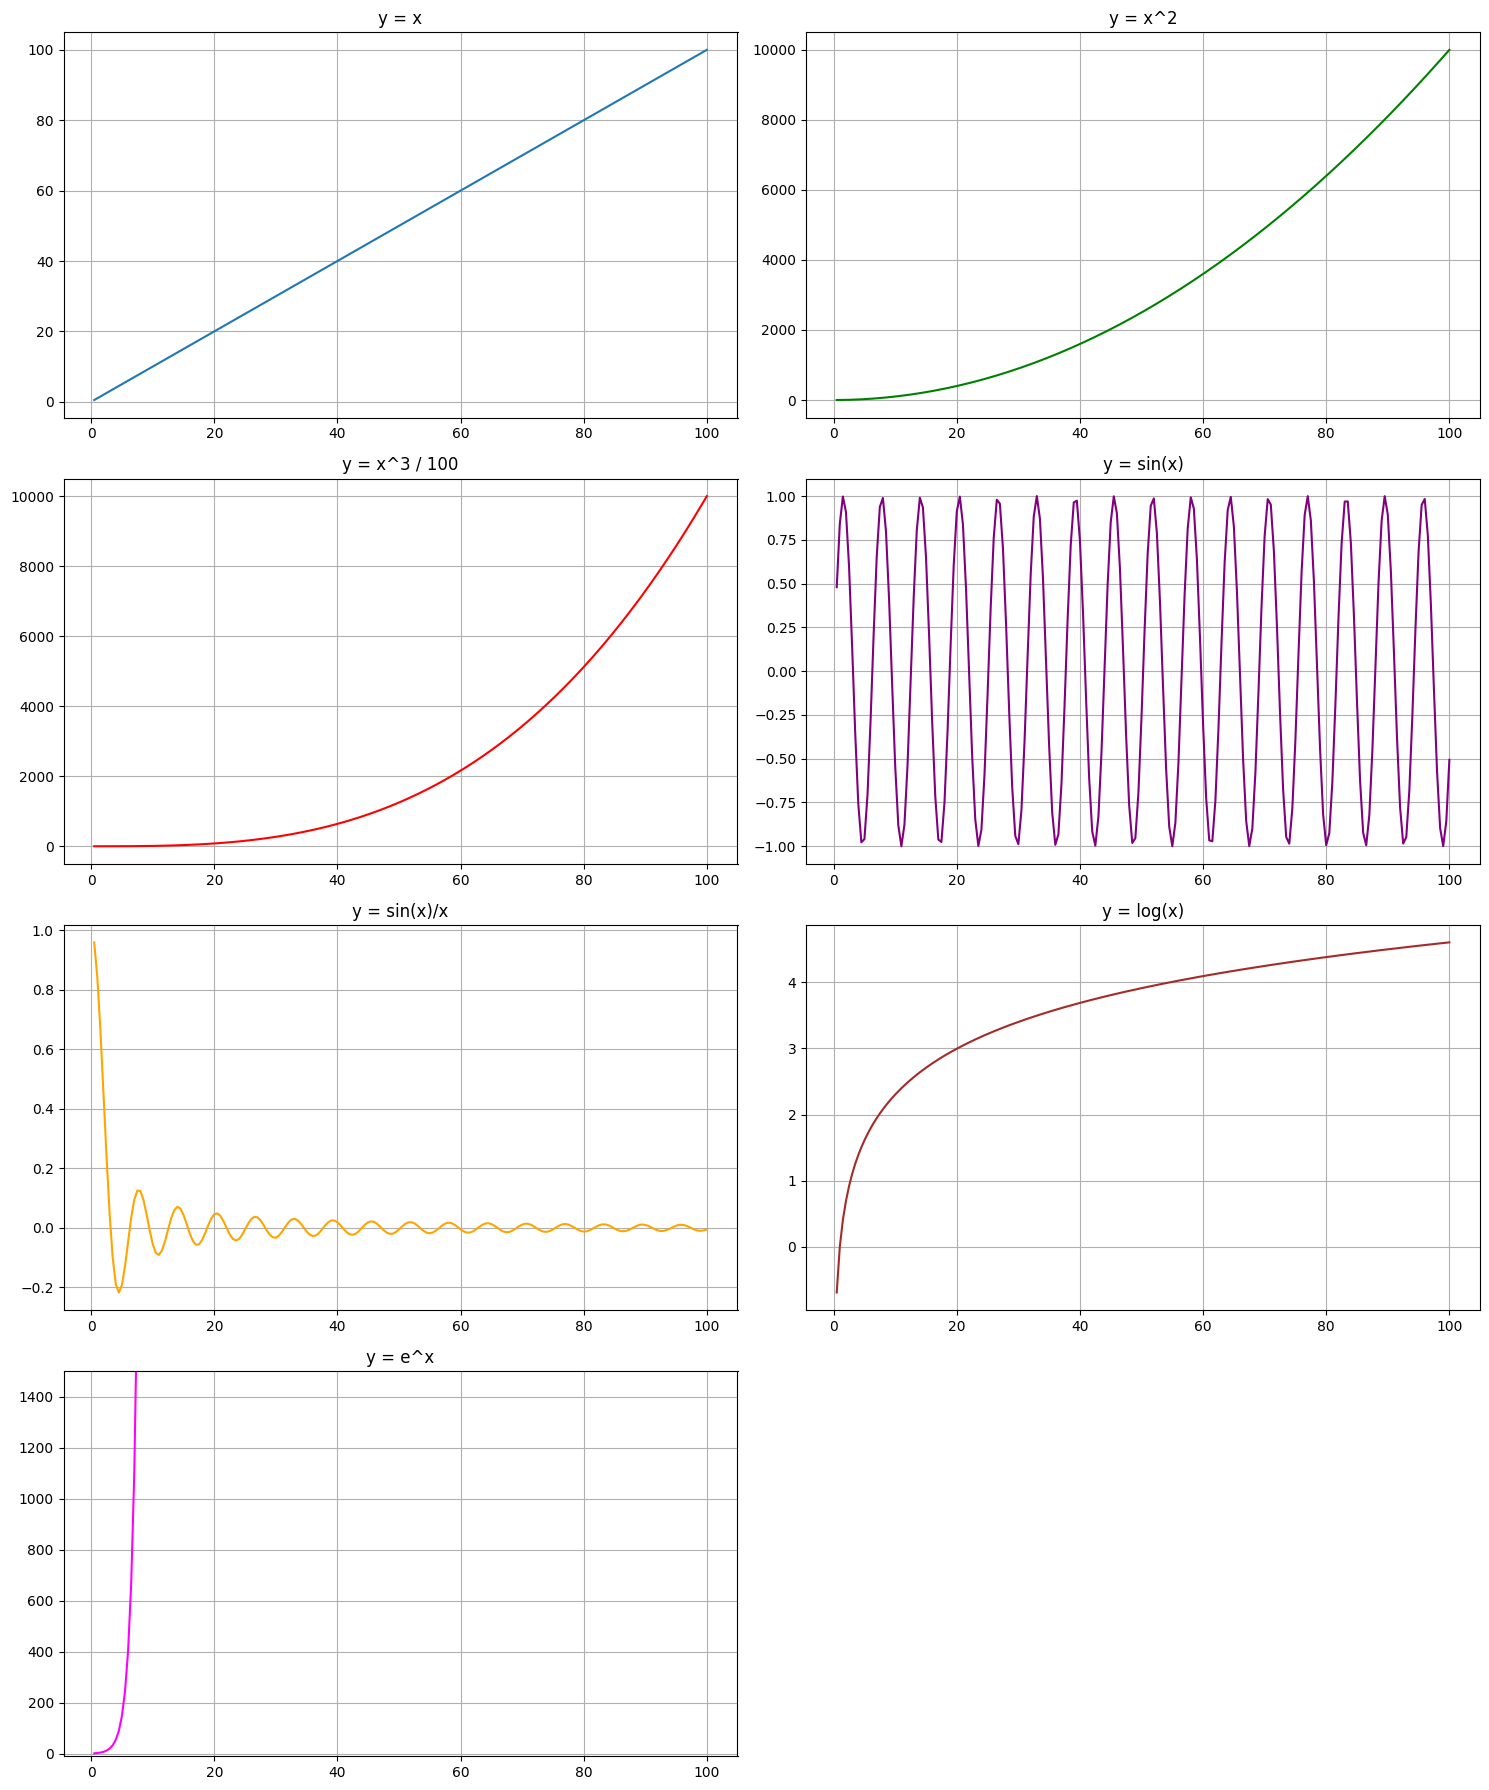

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Define the domain
x = np.arange(0.5, 100.5, 0.5)

# Define functions
y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)  # Note: very large values quickly!

# Plotting
plt.figure(figsize=(15, 18))

# 1. y = x
plt.subplot(4, 2, 1)
plt.plot(x, y1, label="y = x")
plt.title("y = x")
plt.grid(True)

# 2. y = x^2
plt.subplot(4, 2, 2)
plt.plot(x, y2, label="y = x^2", color="green")
plt.title("y = x^2")
plt.grid(True)

# 3. y = x^3 / 100
plt.subplot(4, 2, 3)
plt.plot(x, y3, label="y = x^3 / 100", color="red")
plt.title("y = x^3 / 100")
plt.grid(True)

# 4. y = sin(x)
plt.subplot(4, 2, 4)
plt.plot(x, y4, label="y = sin(x)", color="purple")
plt.title("y = sin(x)")
plt.grid(True)

# 5. y = sin(x) / x
plt.subplot(4, 2, 5)
plt.plot(x, y5, label="y = sin(x)/x", color="orange")
plt.title("y = sin(x)/x")
plt.grid(True)

# 6. y = log(x)
plt.subplot(4, 2, 6)
plt.plot(x, y6, label="y = log(x)", color="brown")
plt.title("y = log(x)")
plt.grid(True)

# 7. y = e^x
plt.subplot(4, 2, 7)
plt.plot(x, y7, label="y = e^x", color="magenta")
plt.title("y = e^x")
plt.ylim(-10, 1500)  # Limit y-axis for better visibility
plt.grid(True)

plt.tight_layout()
plt.show()

### Q10 - Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [60]:
import numpy as np
import pandas as pd

matrix = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])

col_highest_std_idx = df.std().idxmax()
print(f"Column with highest std deviation: {col_highest_std_idx}")

row_means_idx = df.mean(axis=1).idxmin()
print(f"Row with lowest mean: Index {row_means_idx}")

Column with highest std deviation: c
Row with lowest mean: Index 13


### Q11 - Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [61]:
df["f"] = df["a"] + df["b"] + df["c"] + df["d"] + df["e"]
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

print(len(df[df['g'] == "LT8"]))

std_lt8 = df[df['g'] == 'LT8']['f'].std()
std_gt8 = df[df['g'] == 'GT8']['f'].std()
print(std_lt8, std_gt8)

17
0.577418513677576 0.31417730956696044


### Q12 - Write a small piece of code to explain broadcasting in numpy.

In [62]:
import numpy as np

A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

v = np.array([10, 20, 30])

result = A + v
print(result) # so the row is getting broadcasted, and v is being added to all the rows of A

[[11 22 33]
 [14 25 36]
 [17 28 39]]


### Q13 - Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [63]:
import numpy as np

def argmin(arr):
    min_index = 0
    min_value = arr[0]
    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i
    return min_index

arr = np.array([5, 3, 6, 2, 4])
print("My argmin:", argmin(arr))
print("Numpy argmin:", np.argmin(arr))

My argmin: 3
Numpy argmin: 3
